In [67]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [68]:
sys.path.append('/Users/ratzenboe/Documents/work/code/StarPipeline/')
sys.path.append('/Users/ratzenboe/Documents/work/code/StarPipeline/dev')
from dev.isochrone_nn_interpolator import train_with_validation, FastNNInterpolator

In [69]:
parsec_orig_files_dir = '/Users/ratzenboe/Documents/work/code/SimpleSimulator/simulator/isochrone_files/gaia_phot'
parsec_file_path = '/Users/ratzenboe/Documents/work/data_local/parsec_evo_tracks/all_tracks_Pv1/parsec_tracks_postprocessed.csv'
fname_bg = '/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/mock_edr3/field_1kpc_fundamentals_June2025.csv'

In [70]:
df_field = pd.read_csv(fname_bg)

In [5]:
df_parsec = pd.read_csv(parsec_file_path)

cut = (df_parsec.logAge > 6) & (df_parsec.mass < 20)
df_pasec_train = df_parsec.loc[cut]

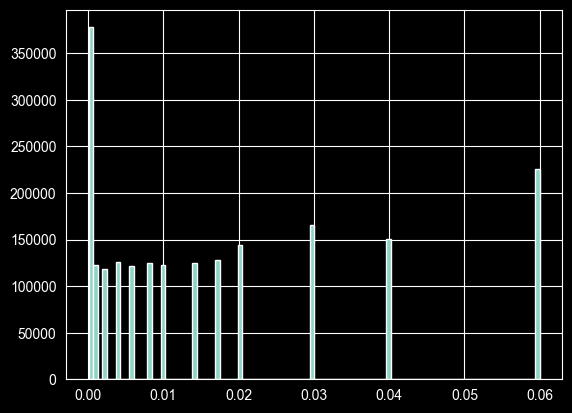

In [35]:
plt.hist(df_pasec_train.Z, bins=100);

In [10]:
df_pasec_train.columns

Index(['logAge', 'mass', 'logL', 'logT', 'logR', 'Z'], dtype='object')

In [12]:
X = df_pasec_train[['logAge', 'mass', 'Z']].values
y = df_pasec_train[['logL', 'logT', 'logR']].values
# y = df_pasec_train[['logAge']].values

In [36]:
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y, test_size=0.4, random_state=0
# )
# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.5, random_state=0
# )
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

X_train = scaler_X.transform(X_train)
# X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.transform(y_train)

In [37]:
X_train.shape

(1643531, 3)

In [38]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [65]:
# model = RandomForestRegressor(n_estimators=500, max_depth=None, n_jobs=-1).fit(X_train, y_train)
# model = MLPRegressor(
#     # loss='squared_error',
#     hidden_layer_sizes=(64,256,64), activation='relu', solver='adam',
#     alpha=0.0001,
#     batch_size=1024,
#     learning_rate='adaptive',
#     learning_rate_init=1e-3,
#     validation_fraction=0.2
# ).fit(X_train, y_train)
# model = HistGradientBoostingRegressor().fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (1643531, 3) instead.

In [58]:
y_test_hat = scaler_y.inverse_transform(model.predict(X_test))
# y_test_hat = model.predict(X_test)

In [59]:
y_test_hat.shape

(410883, 3)

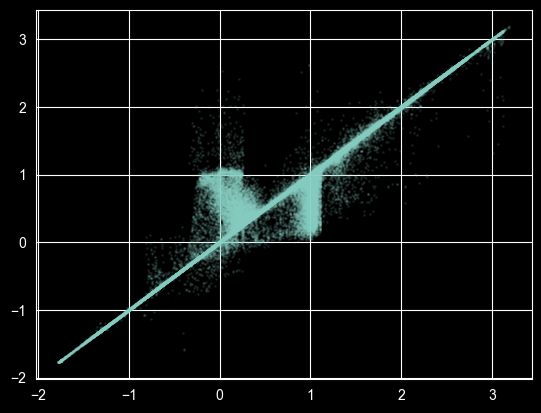

In [64]:
ax = 2
plt.scatter(y_test[:,ax], y_test_hat[:,ax], s=1, alpha=0.1)

In [62]:
np.mean((y_test_hat - y_test)**2)

0.023124356054531524

In [12]:
# model, input_scaler, output_scaler = train_with_validation(
#     X_train, y_train, X_val, y_val
# )

Epoch 0: Train Loss 1.000489, Val Loss 0.976252
Epoch 100: Train Loss 0.423742, Val Loss 0.385908
Epoch 200: Train Loss 0.363224, Val Loss 0.325777
Epoch 300: Train Loss 0.290455, Val Loss 0.244767
Epoch 400: Train Loss 0.241029, Val Loss 0.194955
Epoch 500: Train Loss 0.210311, Val Loss 0.169051
Epoch 600: Train Loss 0.188223, Val Loss 0.148895
Epoch 700: Train Loss 0.171486, Val Loss 0.132388
Epoch 800: Train Loss 0.157703, Val Loss 0.122721
Epoch 900: Train Loss 0.147044, Val Loss 0.112572


In [13]:
fast_interp = FastNNInterpolator(model, input_scaler, output_scaler)

In [201]:
import ezpadova
import ssl

# Bypass SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context
df_load = pd.read_csv('~/Desktop/training_data_isochrones.csv')
r = ezpadova.get_isochrones(
    logage=(6, 9, 0.5),
    MH=(-2.0, -2.0, 0.0),
    # Z=(0.0152, 0.0152, 0),
    photsys_file='gaiaEDR3'
)
df = ezpadova.resample_evolution_label(r)
# plt.hist(df.logTe, bins=100)
# plt.show()

Querying http://stev.oapd.inaf.it/cgi-bin/cmd...
Retrieving data...


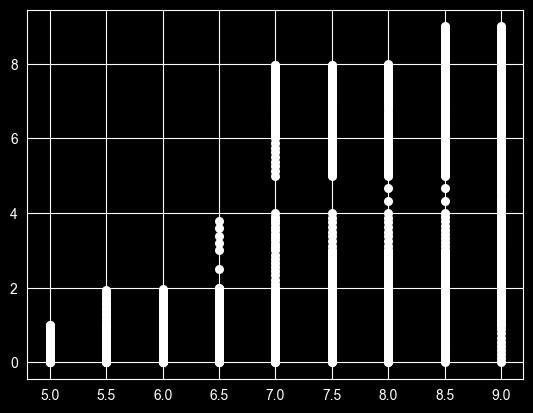

In [200]:
plt.scatter(df.logAge, df.evol, s=30, zorder=9, color='white')
# plt.gca().invert_yaxis()

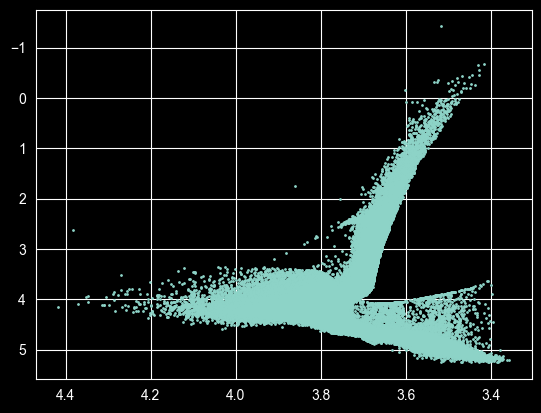

In [74]:
x_plt = df.logTe  #df.G_BPmag - df.G_RPmag
y_plt = df.logg
# plt.scatter(x_plt, y_plt, s=1, c=df.evol, cmap='viridis', zorder=10)
plt.scatter(df_load.teff_col, df_load.logg_col, s=1, zorder=9)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

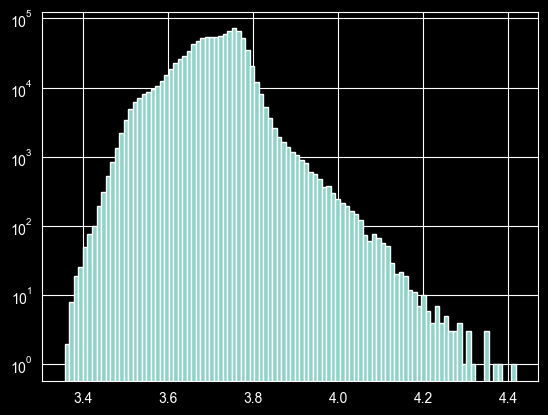

In [86]:
# Try to infer quantities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

df_load['log10_mass'] = np.log10(df_load.smass_col)
plt.hist(df_load.teff_col, bins=100, log=True)

X = df_load[['age_col', 'smass_col', 'feh_col']].values
y = df_load[['logg_col', 'teff_col']].values

In [87]:
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.5, random_state=0
)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

X_train = scaler_X.transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)

# Train tree regression model

In [122]:
from xgboost import XGBRegressor

In [166]:
# model = RandomForestRegressor(n_estimators=500, max_depth=None, n_jobs=-1).fit(X_train, y_train)
model = XGBRegressor(n_estimators=1000, max_depth=None, n_jobs=-1).fit(X_train, y_train)
y_test_hat = scaler_y.inverse_transform(model.predict(X_test))

In [167]:
ax = 0
np.mean(np.sqrt((y_test[:, ax] - y_test_hat[:, ax]) ** 2))

0.019907615794626174

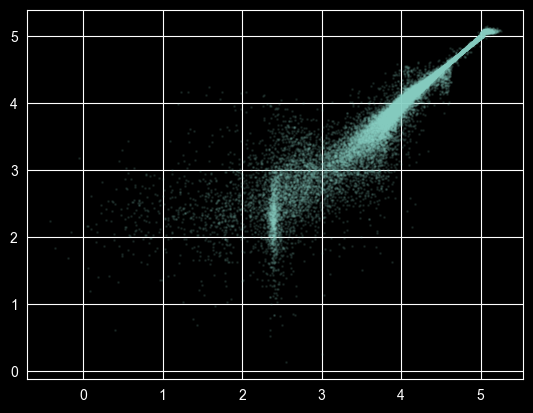

In [168]:
ax = 0
plt.scatter(y_test[:, ax], y_test_hat[:, ax], s=1, alpha=0.1)
# plt.hist(y_test[:, ax], bins=100, log=True, histtype='step', color='red')
# plt.hist(y_test_hat[:, ax], bins=100, log=True, histtype='step', color='blue')
plt.show()

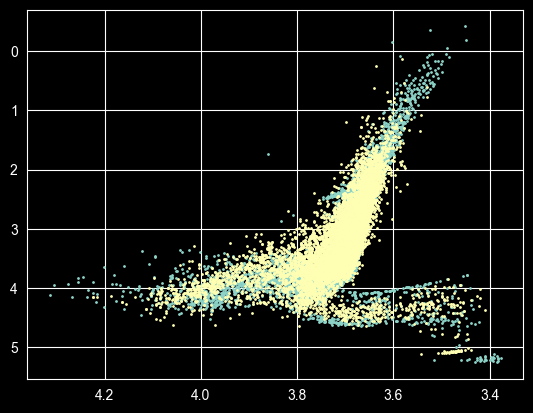

In [170]:
ax = 0
cut = np.abs(y_test[:, ax]- y_test_hat[:, ax])>0.1
plt.scatter(y_test[cut,1], y_test[cut,0], s=1)
plt.scatter(y_test_hat[cut,1], y_test_hat[cut,0], s=1)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
# plt.colorbar()
plt.show()

In [172]:
import jax.numpy as jnp
from jax.scipy.interpolate import RegularGridInterpolator

In [174]:
points = (jnp.array([1, 2, 3]), jnp.array([4, 5, 6]))
values = jnp.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
interpolate = RegularGridInterpolator(points, values, method='linear')

In [178]:
query_points = jnp.array([[1.5, 4.5], [2.2, 5.8]])
interpolate(query_points)

Array([30., 64.], dtype=float32)

In [180]:
points

(Array([1, 2, 3], dtype=int32), Array([4, 5, 6], dtype=int32))

# Train NN

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# ----------------------------
# Model: 3D -> 2D regressor
# ----------------------------
class MLPRegressor(nn.Module):
    def __init__(self, in_dim=3, out_dim=2, hidden=(128, 128), dropout=0.0):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [nn.Linear(prev, h), nn.ReLU()]
            if dropout > 0:
                layers += [nn.Dropout(dropout)]
            prev = h
        layers += [nn.Linear(prev, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

In [78]:
# ------------------------------------------------
# Focal loss for regression (Focal Huber / SmoothL1)
# ------------------------------------------------
class FocalHuberLoss(nn.Module):
    """
    Focalized Huber (SmoothL1) regression loss.

    base = SmoothL1(pred, target; beta)
    focal factor = (|pred-target| / (beta + eps))^gamma   (clamped optional)

    If sample_weight is provided, it should broadcast to pred/target:
      - shape [N] or [N,1] or [N,2]
    """
    def __init__(
        self,
        beta: float = 1.0,          # SmoothL1 transition point
        gamma: float = 2.0,         # focal focusing parameter
        reduction: str = "mean",
        eps: float = 1e-6,
        detach_focal: bool = True,  # often stabilizes training
        max_focal: float | None = 100.0,  # clamp to avoid huge weights
    ):
        super().__init__()
        assert reduction in ("none", "mean", "sum")
        self.beta = beta
        self.gamma = gamma
        self.reduction = reduction
        self.eps = eps
        self.detach_focal = detach_focal
        self.max_focal = max_focal

    def forward(self, pred: torch.Tensor, target: torch.Tensor, sample_weight: torch.Tensor | None = None):
        # elementwise absolute error
        abs_err = (pred - target).abs()

        # SmoothL1 / Huber elementwise loss
        base = F.smooth_l1_loss(pred, target, beta=self.beta, reduction="none")

        # focal factor based on normalized residual magnitude
        focal = (abs_err / (self.beta + self.eps)).pow(self.gamma)
        if self.detach_focal:
            focal = focal.detach()
        if self.max_focal is not None:
            focal = focal.clamp_max(self.max_focal)

        loss = focal * base

        if sample_weight is not None:
            # make it broadcastable
            if sample_weight.ndim == 1:
                sample_weight = sample_weight[:, None]
            loss = loss * sample_weight

        if self.reduction == "none":
            return loss
        if self.reduction == "sum":
            return loss.sum()
        # mean over all elements
        return loss.mean()

In [99]:
# ---------------------------------------------------------
# Optional: build sample weights to address target imbalance
# ---------------------------------------------------------
@torch.no_grad()
def make_inverse_frequency_weights_2d(targets: torch.Tensor, bins_per_dim: int = 10, eps: float = 1e-12):
    """
    targets: [N,2]
    Creates weights by binning y1 and y2 into a 2D histogram grid and using inverse frequency.
    """
    assert targets.ndim == 2 and targets.size(1) == 2
    y = targets

    # bin edges per dimension
    edges0 = torch.linspace(y[:, 0].min(), y[:, 0].max(), bins_per_dim + 1, device=y.device)
    edges1 = torch.linspace(y[:, 1].min(), y[:, 1].max(), bins_per_dim + 1, device=y.device)

    # bucketize -> bin index in [0, bins_per_dim-1]
    b0 = torch.bucketize(y[:, 0], edges0) - 1
    b1 = torch.bucketize(y[:, 1], edges1) - 1
    b0 = b0.clamp(0, bins_per_dim - 1)
    b1 = b1.clamp(0, bins_per_dim - 1)

    # 2D bin id
    bid = b0 * bins_per_dim + b1
    nbins = bins_per_dim * bins_per_dim

    counts = torch.bincount(bid, minlength=nbins).float()
    inv = 1.0 / (counts + eps)
    w = inv[bid]

    # normalize weights to have mean ~ 1.0 (helps LR tuning)
    w = w / w.mean().clamp_min(eps)
    return w  # [N]

# ----------------------------
# Example training skeleton
# ----------------------------
def train(
    X_train: torch.Tensor,  # [N,3]
    Y_train: torch.Tensor,  # [N,2]
    X_val: torch.Tensor | None = None,
    Y_val: torch.Tensor | None = None,
    use_target_imbalance_weights: bool = True,
    focal_gamma: float = 2.0,
    huber_beta: float = 1.0,
    lr: float = 1e-3,
    batch_size: int = 256,
    epochs: int = 50,
    device: str = "cuda" if torch.cuda.is_available() else "cpu",
):
    model = MLPRegressor(in_dim=3, out_dim=2, hidden=(128, 128), dropout=0.0).to(device)
    criterion = FocalHuberLoss(beta=huber_beta, gamma=focal_gamma, reduction="mean").to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr)

    X_train = X_train.to(device).float()
    Y_train = Y_train.to(device).float()

    if use_target_imbalance_weights:
        train_w = make_inverse_frequency_weights_2d(Y_train, bins_per_dim=20).to(device)  # [N]
    else:
        train_w = None

    train_ds = TensorDataset(X_train, Y_train) if train_w is None else TensorDataset(X_train, Y_train, train_w)
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)

    if X_val is not None and Y_val is not None:
        X_val = X_val.to(device).float()
        Y_val = Y_val.to(device).float()

    for ep in range(1, epochs + 1):
        model.train()
        running = 0.0

        for batch in train_dl:
            if train_w is None:
                xb, yb = batch
                wb = None
            else:
                xb, yb, wb = batch

            pred = model(xb)
            loss = criterion(pred, yb, sample_weight=wb)

            opt.zero_grad(set_to_none=True)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            opt.step()

            running += loss.item() * xb.size(0)

        train_loss = running / len(train_ds)

        if X_val is not None:
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                # plain (non-focal) metric for interpretability
                val_mae = (val_pred - Y_val).abs().mean().item()
                val_rmse = torch.sqrt(((val_pred - Y_val) ** 2).mean()).item()
            print(f"Epoch {ep:03d} | train focal-huber: {train_loss:.6f} | val MAE: {val_mae:.6f} | val RMSE: {val_rmse:.6f}")
        else:
            print(f"Epoch {ep:03d} | train focal-huber: {train_loss:.6f}")

    return model

In [102]:
model = train(
    X_train=torch.as_tensor(X_train),  # [N,3]
    Y_train=torch.as_tensor(y_train),  # [N,2]
    X_val=torch.as_tensor(X_val),
    Y_val=torch.as_tensor(y_val),
    use_target_imbalance_weights=True,
    focal_gamma=2.0,
    huber_beta=1.0,
    lr=1e-4,
    batch_size=512,
    epochs=100,
    device="cpu",
)

Epoch 001 | train focal-huber: 97.814911 | val MAE: 1.284642 | val RMSE: 1.561203
Epoch 002 | train focal-huber: 70.953005 | val MAE: 1.201185 | val RMSE: 1.552989
Epoch 003 | train focal-huber: 62.939391 | val MAE: 1.007505 | val RMSE: 1.379021
Epoch 004 | train focal-huber: 63.699056 | val MAE: 0.834493 | val RMSE: 1.211212
Epoch 005 | train focal-huber: 68.796080 | val MAE: 0.770755 | val RMSE: 1.118467
Epoch 006 | train focal-huber: 70.413909 | val MAE: 0.720687 | val RMSE: 1.095546
Epoch 007 | train focal-huber: 80.546463 | val MAE: 0.718446 | val RMSE: 1.091223
Epoch 008 | train focal-huber: 85.668154 | val MAE: 0.643240 | val RMSE: 1.001250
Epoch 009 | train focal-huber: 86.017802 | val MAE: 0.624008 | val RMSE: 0.955934
Epoch 010 | train focal-huber: 94.375004 | val MAE: 0.596251 | val RMSE: 0.941153
Epoch 011 | train focal-huber: 98.834202 | val MAE: 0.565546 | val RMSE: 0.855639
Epoch 012 | train focal-huber: 103.079072 | val MAE: 0.583520 | val RMSE: 0.875826
Epoch 013 | tra

In [104]:
y_test_hat = model(torch.as_tensor(X_test).to("cpu").float()).detach()
y_test_hat = scaler_y.inverse_transform(y_test_hat)

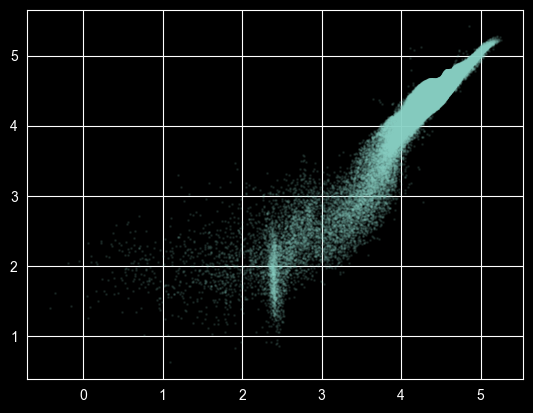

In [105]:
ax = 0
plt.scatter(y_test[:, ax], y_test_hat[:, ax], s=1, alpha=0.1)
# plt.hist(y_test[:, ax], bins=100, log=True, histtype='step', color='red')
# plt.hist(y_test_hat[:, ax], bins=100, log=True, histtype='step', color='blue')
plt.show()

In [114]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class MLPRegressor(nn.Module):
    def __init__(self, in_dim=3, out_dim=2, hidden=(16, 16), dropout=0.0):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [nn.Linear(prev, h), nn.ReLU()]
            if dropout > 0:
                layers += [nn.Dropout(dropout)]
            prev = h
        layers += [nn.Linear(prev, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

@torch.no_grad()
def make_inverse_frequency_weights_2d(targets: torch.Tensor, bins_per_dim: int = 10, eps: float = 1e-12):
    # targets: [N,2]
    y = targets
    edges0 = torch.linspace(y[:, 0].min(), y[:, 0].max(), bins_per_dim + 1, device=y.device)
    edges1 = torch.linspace(y[:, 1].min(), y[:, 1].max(), bins_per_dim + 1, device=y.device)

    b0 = (torch.bucketize(y[:, 0], edges0) - 1).clamp(0, bins_per_dim - 1)
    b1 = (torch.bucketize(y[:, 1], edges1) - 1).clamp(0, bins_per_dim - 1)

    bid = b0 * bins_per_dim + b1
    nbins = bins_per_dim * bins_per_dim
    counts = torch.bincount(bid, minlength=nbins).float()

    w = 1.0 / (counts[bid] + eps)
    w = w / w.mean().clamp_min(eps)  # normalize mean weight ~ 1
    return w  # [N]

def weighted_mse(pred, target, w=None):
    # pred/target: [N,2], w: [N] or [N,1] or [N,2]
    err2 = (pred - target) ** 2  # [N,2]
    if w is None:
        return err2.mean()
    if w.ndim == 1:
        w = w[:, None]  # [N,1] -> broadcast to [N,2]
    return (w * err2).mean()

def train_weighted_mse(X_train, Y_train, epochs=50, batch_size=256, lr=1e-3, hidden=(16, 16),
                       bins_per_dim=10, device="cuda" if torch.cuda.is_available() else "cpu"):
    model = MLPRegressor(3, 2, hidden=hidden).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr)

    X_train = X_train.to(device).float()
    Y_train = Y_train.to(device).float()

    w = make_inverse_frequency_weights_2d(Y_train, bins_per_dim=bins_per_dim).to(device)  # [N]

    ds = TensorDataset(X_train, Y_train, w)
    dl = DataLoader(ds, batch_size=batch_size, shuffle=True)

    for ep in range(1, epochs + 1):
        model.train()
        total = 0.0
        for xb, yb, wb in dl:
            pred = model(xb)
            loss = weighted_mse(pred, yb, None)

            opt.zero_grad(set_to_none=True)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()

            total += loss.item() * xb.size(0)

        print(f"Epoch {ep:03d} | train weighted MSE: {total / len(ds):.6f}")

    return model

In [115]:
model_mse = train_weighted_mse(
    X_train=torch.as_tensor(X_train),  # [N,3]
    Y_train=torch.as_tensor(y_train),  # [N,2]
    epochs=100,
    batch_size=2048,
    lr=1e-3,
    bins_per_dim=10,
    device="cuda" if torch.cuda.is_available() else "cpu"
)

Epoch 001 | train weighted MSE: 0.493634
Epoch 002 | train weighted MSE: 0.229153
Epoch 003 | train weighted MSE: 0.168402
Epoch 004 | train weighted MSE: 0.135198
Epoch 005 | train weighted MSE: 0.113984
Epoch 006 | train weighted MSE: 0.099159
Epoch 007 | train weighted MSE: 0.087453
Epoch 008 | train weighted MSE: 0.078343
Epoch 009 | train weighted MSE: 0.070769
Epoch 010 | train weighted MSE: 0.065115
Epoch 011 | train weighted MSE: 0.060580
Epoch 012 | train weighted MSE: 0.057469
Epoch 013 | train weighted MSE: 0.054460
Epoch 014 | train weighted MSE: 0.051906
Epoch 015 | train weighted MSE: 0.050093
Epoch 016 | train weighted MSE: 0.048276
Epoch 017 | train weighted MSE: 0.046879
Epoch 018 | train weighted MSE: 0.045672
Epoch 019 | train weighted MSE: 0.044613
Epoch 020 | train weighted MSE: 0.043772
Epoch 021 | train weighted MSE: 0.042878
Epoch 022 | train weighted MSE: 0.042241
Epoch 023 | train weighted MSE: 0.041820
Epoch 024 | train weighted MSE: 0.041085
Epoch 025 | trai

In [116]:
y_test_hat = model_mse(torch.as_tensor(X_test).to("cpu").float()).detach()
y_test_hat = scaler_y.inverse_transform(y_test_hat)

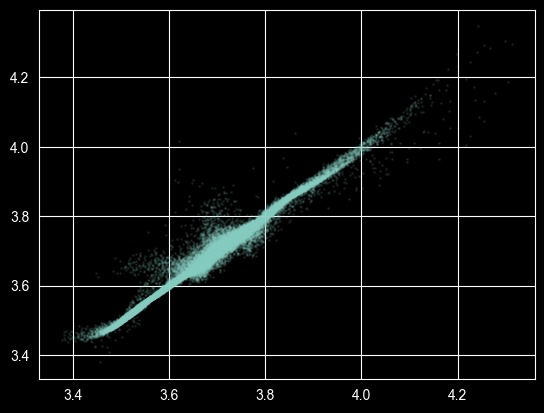

In [121]:
ax = 1
plt.scatter(y_test[:, ax], y_test_hat[:, ax], s=1, alpha=0.1)
plt.show()